In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import distance
from multiprocessing import Pool
import json
from bisect import bisect_left
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [21]:
chunks = ['S'+str(i) for i in range(1,13)]
data = {}
clean_data = {}

for f in os.listdir('/home/katya/start/HIS3InterspeciesEpistasis/Data/'):
    if 'csv' in f:
        data[f[:-19]] = pd.DataFrame.from_csv('/home/katya/start/HIS3InterspeciesEpistasis/Data/' + f, sep='\t')
        median = np.median(data[f[:-19]].index.str.len())
        
        clean_data[f[:-19]] = data[f[:-19]][(data[f[:-19]].nonsense == 0) & (data[f[:-19]].middle == 1) & \
                                            (data[f[:-19]].nat_lib == 1) & (data[f[:-19]].stop == 0) & \
                                            (data[f[:-19]].index.str.len() == median) & (data[f[:-19]]['size'] >= 3)]

In [22]:
len(clean_data['S7'])

4235

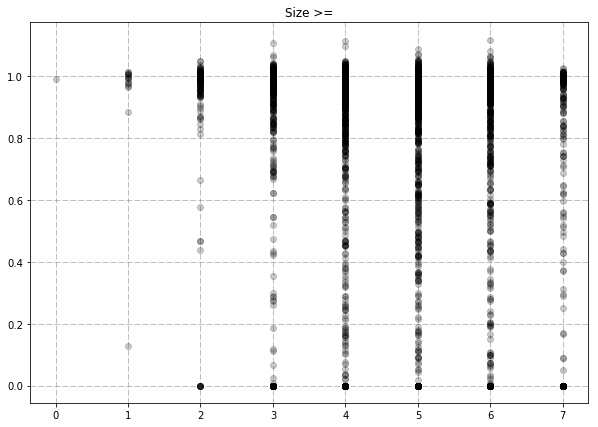

In [23]:
x = clean_data['S7'].dist_Scer
y = clean_data['S7'].s
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.plot(x,y,'ok',alpha=0.2)
plt.title('Size >=')

In [24]:
color_dict={}
color_dict[11] = '#00AEE9'
color_dict[10] = '#34ADD3'
color_dict[9] = '#70ADC7'
color_dict[8] = '#70ADC7'
color_dict[7] = '#70ADC7'
color_dict[6] = '#9AABB4'
color_dict[5] = '#9AABB4'
color_dict[4] = '#A7A9AC'
color_dict[3] = '#A7A9AC'
color_dict[2] = '#A7A9AC'
color_dict[1] = '#A7A9AC'

In [27]:
def write_json(chunk):
    print chunk
    
    fitThres = [0.45*(10-i)*0.1 for i in range(11)]
    fitThres.sort()
    
    sqs = list(clean_data[chunk].index)
    
    data = {}
    data['nodes'] = []
    counter = 0
    for i in range(len(sqs)):
        counter+=1
        data['nodes'].append({'name':'%s, distance: %d, fitness: %.2f' % (clean_data[chunk].mut_list[i], clean_data[chunk].dist_Scer[i], clean_data[chunk].s[i]),
                              'x':(clean_data[chunk].dist_Scer[i] + np.random.normal(0, .01)), 
                              'y':-(clean_data[chunk].s[i]*4)})
        
    data['connections'] = []
    
    done = []
    for i1 in range(len(sqs)):
        if i1%1000 == 0:
            print i1
        done.append(sqs[i1])
        for i2 in range(len(sqs)):
            if sqs[i2] not in done and clean_data[chunk].dist_Scer[i1]!=clean_data[chunk].dist_Scer[i2] \
            and distance.hamming(sqs[i1],sqs[i2]) == 1:
                
                minimum = min(clean_data[chunk].s[i1], clean_data[chunk].s[i2])
                ind = np.searchsorted(fitThres, minimum, side='right')
                data['connections'].append({'source':data['nodes'][i1]['name'], 'target':data['nodes'][i2]['name'], 'color':color_dict[ind], 'min':minimum})
                   
    with open('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/Fig2/Build/data/' + chunk + '.json', 'w+') as outfile:  
        json.dump(data, outfile)

In [28]:
write_json('S7')

S7
0
1000
2000
3000
4000


In [ ]:
pool = Pool()
pool.map(write_json, chunks)

S1
S2
S12
S5
S6
S4
S8
S11
S7
S10
S3
S9
0
0
0
0
0
0
0
0
0
0
0
0


***